<a href="https://colab.research.google.com/github/thearcanist/House-prices-predictor/blob/master/housing_model_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [0]:
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [0]:
#shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_Data = train_data[order]
train_labels = train_labels[order]

In [0]:
train_data, train_labels

(array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
         3.96900e+02, 1.87200e+01],
        [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
         3.95380e+02, 3.11000e+00],
        [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         3.75520e+02, 3.26000e+00],
        ...,
        [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
         3.62250e+02, 7.83000e+00],
        [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
         2.61950e+02, 1.57900e+01],
        [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
         3.76700e+02, 4.38000e+00]]),
 array([32. , 27.5, 32. , 23.1, 50. , 20.6, 22.6, 36.2, 21.8, 19.5, 15. ,
        15.6, 50. , 30.1, 12.5, 22.2, 26.5, 50. ,  8.3, 16.5, 17.8, 15.7,
        19.3, 26.6, 29. , 15.6, 18.7, 24.1, 13.3,  8.5, 19.5, 13.1, 11.7,
        25. , 24.8, 20.6, 12.1, 19.6, 25. , 22.7, 14.6, 17.1, 50. , 22.6,
        13.1, 20.6, 18.4, 24.8, 25. , 18.1, 16.8, 16.1, 24.4, 18.5, 21. ,
   

In [0]:
print("Training set: {}".format(train_data.shape))
print("Testing set:{}".format(test_data.shape))

Training set: (404, 13)
Testing set:(102, 13)


In [0]:
import pandas as pd
  
column_names = ['CRIME RATE PER CAPITA', 'RESIDENTIAL ZONE', 'NON-RETAIL BUSINESS ZONES', 'RIVER TRACT', 'NITRIC OXIDE PPM', 'ROOMS PER DWELLING AVG', 'AGE', 'DISTANCE FROM EMPLOYMENT CENTERS','DISTANCE FROM THE HIGHWAYS', 'TAX', 'PUPIL-TEACHER-RATIO', 'BLACKS', 'LOWER STATUS OF POPULATION']
  
df = pd.DataFrame(train_data, columns = column_names)
df

,CRIME RATE PER CAPITA,RESIDENTIAL ZONE,NON-RETAIL BUSINESS ZONES,RIVER TRACT,NITRIC OXIDE PPM,ROOMS PER DWELLING AVG,AGE,DISTANCE FROM EMPLOYMENT CENTERS,DISTANCE FROM THE HIGHWAYS,TAX,PUPIL-TEACHER-RATIO,BLACKS,LOWER STATUS OF POPULATION
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
5,0.28392,0.0,7.38,0.0,0.4930,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
6,9.18702,0.0,18.10,0.0,0.7000,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60
7,4.09740,0.0,19.58,0.0,0.8710,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42
8,2.15505,0.0,19.58,0.0,0.8710,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65
9,1.62864,0.0,21.89,0.0,0.6240,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41


In [0]:
print(train_labels[0:10])

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


In [0]:
#Test data is *not* used when calculating the mean and std

mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)
train_data = (train_data - mean) / std
train_Data = (test_data - mean) / std

print(train_data[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [0]:
def build_model():
  model = keras.Sequential([
      keras.layers.Dense(64, activation = tf.nn.relu, input_shape = (train_data.shape[1],)),
      keras.layers.Dense(64, activation = tf.nn.relu),
      keras.layers.Dense(1)
  ])
  
  optimizer = tf.train.RMSPropOptimizer(0.001)
  
  model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae'])
  
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Training the model
history = model.fit(train_data, train_labels, epochs = 500, validation_split = 0.2, verbose = 1)

Train on 323 samples, validate on 81 samples
Epoch 1/500
323/323 [==============================] - 0s 674us/step - loss: 539.6446 - mean_absolute_error: 21.3338 - val_loss: 557.7787 - val_mean_absolute_error: 21.7882
Epoch 2/500
323/323 [==============================] - 0s 61us/step - loss: 482.6726 - mean_absolute_error: 19.9085 - val_loss: 497.2073 - val_mean_absolute_error: 20.3288
Epoch 3/500
323/323 [==============================] - 0s 66us/step - loss: 419.1021 - mean_absolute_error: 18.2024 - val_loss: 423.5790 - val_mean_absolute_error: 18.3654
Epoch 4/500
323/323 [==============================] - 0s 57us/step - loss: 346.0245 - mean_absolute_error: 15.9788 - val_loss: 343.9625 - val_mean_absolute_error: 15.9347
Epoch 5/500
323/323 [==============================] - 0s 59us/step - loss: 270.8038 - mean_absolute_error: 13.4722 - val_loss: 265.8177 - val_mean_absolute_error: 13.2697
Epoch 6/500
323/323 [==============================] - 0s 60us/step - loss: 203.8936 - mean_ab

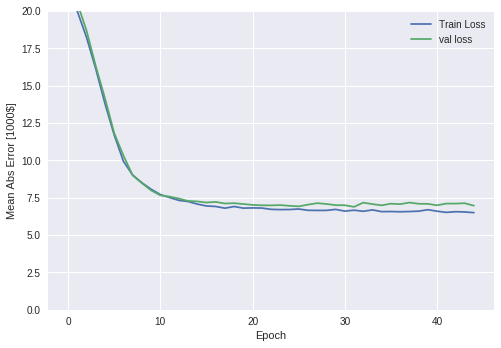

In [0]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),label = 'Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),label = 'val loss')
  
  plt.legend()
  plt.ylim([0, 20])
plot_history(history)

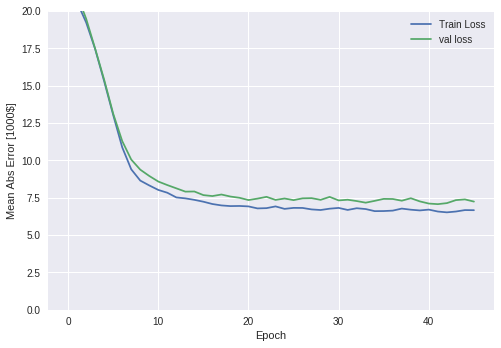

In [0]:
model = build_model()

#The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20)

history = model.fit(train_data, train_labels, epochs = 500, validation_split = 0.2, verbose = 0, callbacks = [early_stop])

plot_history(history)

In [0]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose = 0)

print('Testing set mean Abs Error: ${:7.2f}'.format(mae * 100))

Testing set mean Abs Error: $268983.49


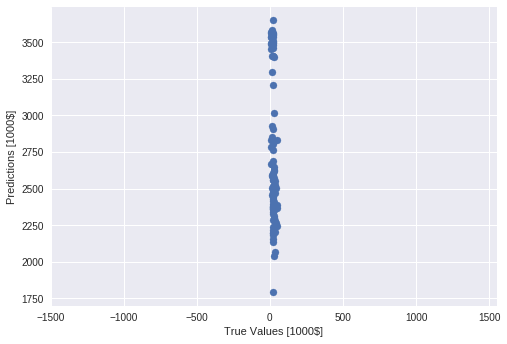

In [0]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

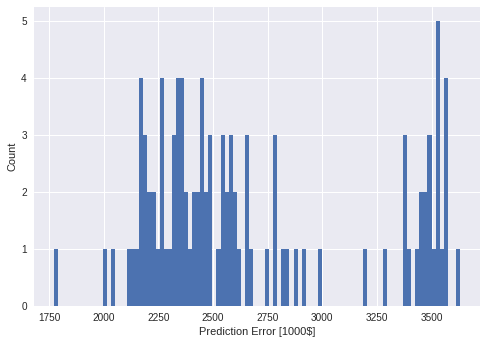

In [0]:
error = test_predictions - test_labels
plt.hist(error, bins = )
plt.xlabel('Prediction Error [1000$]')
_ = plt.ylabel('Count')